![](http://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png)

I am super excited to share my first kernel with the Kaggle community. This kernel is for all the aspiring data scientists who wants to learn and review their knowledge. As I go on in this journey and learn new topics, I will incorporate them with each new updates. Going back to the topics of this kernel, I will do visualizations to explain the data, and machine learning algorithms to forecast bike rental demand  in the Capital Bikeshare program in Washington, D.C.

In [1]:
#Let's import the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the dataset
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
data = train.append(test, sort = False)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
datetime      17379 non-null object
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        10886 non-null float64
registered    10886 non-null float64
count         10886 non-null float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


Types of variables:
* Categorical - Season, Holiday, Working day, Weather
* Timeseries - Datetime
* Numerical - Temp, aTemp, Humidity, Windspeed, Casual, Registered, Count

In [4]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000,10886.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,36.021955,155.552177,191.574132
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,118.000000,145.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


**Exploratory Data Analysis**

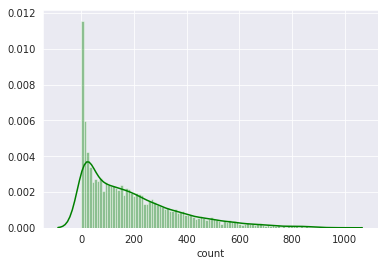

In [5]:
#Histogram for count
sns.set_style('darkgrid')
sns.distplot(train['count'], bins = 100, color = 'green')
plt.show()

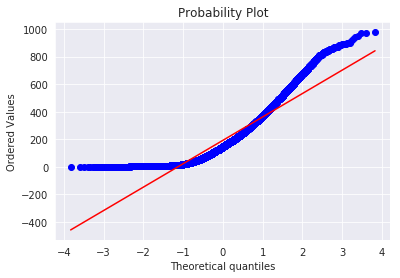

In [6]:
#Q-Q Plot
from scipy import stats
plt = stats.probplot(train['count'], plot=sns.mpl.pyplot)

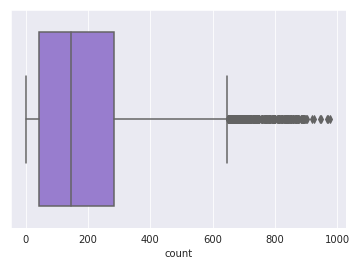

In [7]:
#Boxplot for count
import matplotlib.pyplot as plt
sns.boxplot(x = 'count', data = train, color = 'mediumpurple')
plt.show()

These three charts above can tell us a lot about our target variable.

* Our target variable, count is not normally distributed.
* Our target variable is right-skewed.
* There are multiple outliers in the variable.

In [8]:
#Calculating the number of outliers
Q1 = train['count'].quantile(0.25)
Q3 = train['count'].quantile(0.75)
IQR = Q3 - Q1
outliers = train[(train['count'] < (Q1 - 1.5 * IQR)) | (train['count'] > (Q3 + 1.5 * IQR))]
print((len(outliers)/len(data))*100)

1.7262213015708614


1.72% of the target values are above Q3 + 1.5IQR. Let's get rid of this.

In [9]:
#Data without the outliers in count
data = data[~data.isin(outliers)]
data = data[data['datetime'].notnull()]

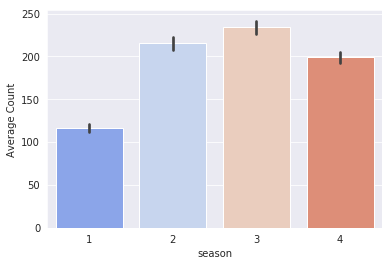

In [10]:
sns.barplot(x = 'season', y = 'count', data = train, estimator = np.average, palette='coolwarm')
plt.ylabel('Average Count')
plt.show()

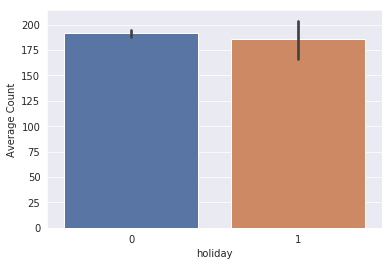

In [11]:
sns.barplot(x = 'holiday', y = 'count', data = train, estimator = np.average, palette='deep')
plt.ylabel('Average Count')
plt.show()

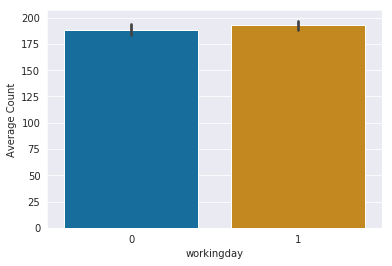

In [12]:
sns.barplot(x = 'workingday', y = 'count', data = train, estimator = np.average, palette='colorblind')
plt.ylabel('Average Count')
plt.show()

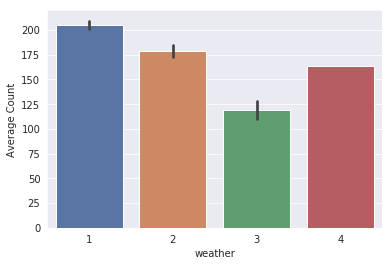

In [13]:
sns.barplot(x = 'weather', y = 'count', data = train, estimator = np.average, palette='deep')
plt.ylabel('Average Count')
plt.show() 

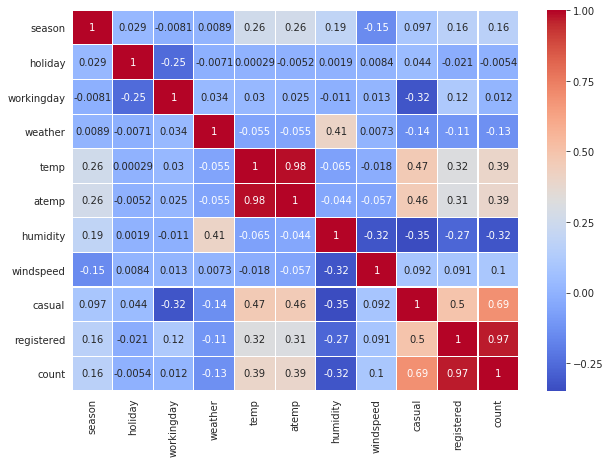

In [14]:
plt.figure(figsize = (10,7))
tc = train.corr()
sns.heatmap(tc, annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths=0.1)

Count is hightly correlated with Casual and Registered. It's because Count is derived from Casual and Registered. We'll have to omit these variables. Temp and atemp are highly correlated.

In [15]:
#Convert to integer variables
columns=['season', 'holiday', 'workingday', 'weather']
for i in columns:
    data[i] = data[i].apply(lambda x : int(x))

In [16]:
#Convert string to datatime and create Hour, Month and Day of week
data['datetime'] = pd.to_datetime(data['datetime'])
data['Hour'] = data['datetime'].apply(lambda x:x.hour)
data['Month'] = data['datetime'].apply(lambda x:x.month)
data['Day of Week'] = data['datetime'].apply(lambda x:x.dayofweek)

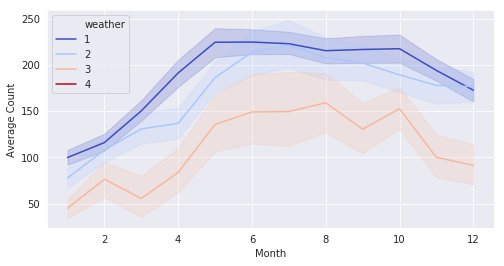

In [17]:
plt.figure(figsize = (8,4))
sns.lineplot(x = 'Month', y = 'count', data = data, estimator = np.average, hue = 'weather', palette = 'coolwarm')
plt.ylabel('Average Count')
plt.show()

In [18]:
data[data['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,Day of Week
5631,2012-01-09 18:00:00,1,0,1,4,8.20,11.365,86.0,6.0032,6.0,158.0,164.0,18,1,0
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.850,93.0,22.0028,NaN,NaN,NaN,16,1,2
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.820,86.0,12.9980,NaN,NaN,NaN,1,1,5


There is no line plot for weather = 4, because there is only three data point for weather = 4

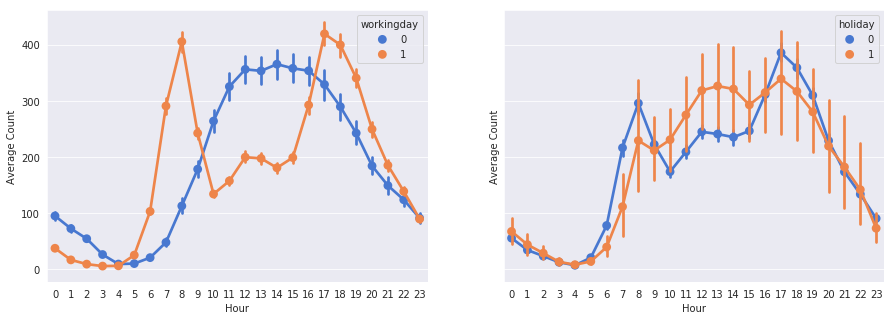

In [19]:
fig, axes = plt.subplots(ncols = 2, figsize = (15,5), sharey = True)
sns.pointplot(x = 'Hour', y = 'count', data = data, estimator = np.average, hue = 'workingday', ax = axes[0], palette = 'muted')
sns.pointplot(x = 'Hour', y = 'count', data = data, estimator = np.average, hue = 'holiday', ax = axes[1], palette = 'muted')
ax = [0,1]
for i in ax:
    axes[i].set(ylabel='Average Count')

* During working days there is a high demand around the 7th hour and 17th hour. There is a lower demand during 0 to 5th hour and 10 to 14th hour.
* During non workin days there is a high demand during 10 to 14th hour. There is a lower demand around the 7th hour.

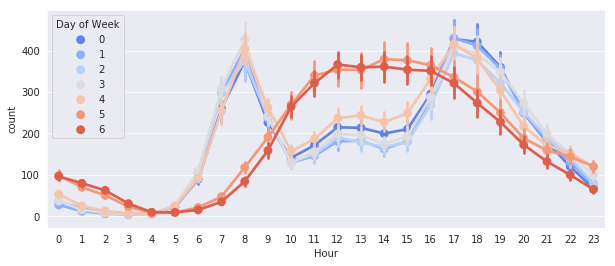

In [20]:
plt.figure(figsize = (10,4))
sns.pointplot(x = 'Hour', y = 'count', data = data, estimator=np.average, hue = 'Day of Week', palette='coolwarm')

Clearly, weekend and weekdays follows a different pattern.

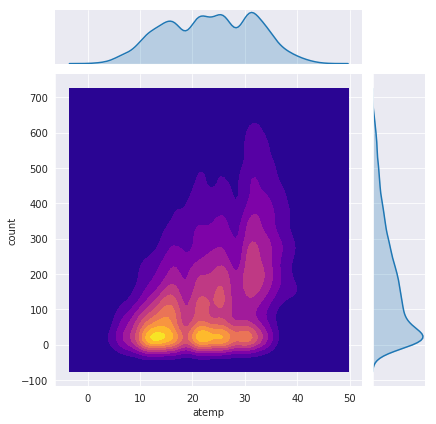

In [21]:
sns.jointplot(x = 'atemp', y = 'count', data = data, kind = 'kde', cmap = 'plasma')
plt.show()

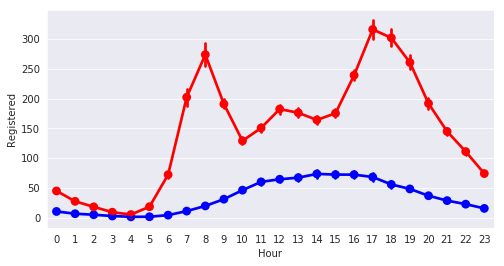

In [22]:
plt.figure(figsize = (8,4))
sns.pointplot(x = 'Hour', y = 'casual', data = data, estimator = np.average, color = 'blue')
sns.pointplot(x = 'Hour', y = 'registered', data = data, estimator = np.average, color = 'red')
plt.ylabel('Registered')
plt.show()

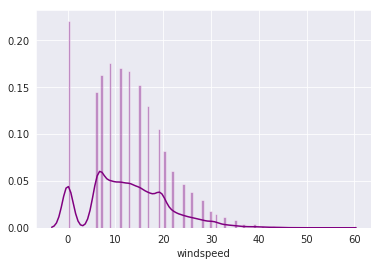

In [23]:
#Histogram for Windspeed
sns.set_style('darkgrid')
sns.distplot(data['windspeed'], bins = 100, color = 'purple') #Windspeed cannot be 0.
plt.show()

**Feature Engineering**

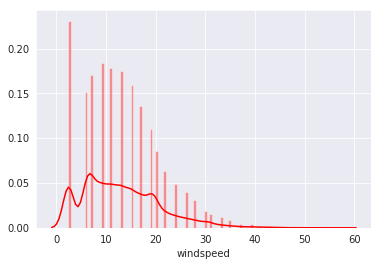

In [24]:
#Replacing 0s in windspeed with the mean value grouped by season
data['windspeed'] = data['windspeed'].replace(0, np.nan)
data['windspeed'] = data['windspeed'].fillna(data.groupby('weather')['season'].transform('mean'))
sns.distplot(data['windspeed'], bins = 100, color = 'red')
plt.show()

In [25]:
#Encoding cyclical features
data['Month_sin'] = data['Month'].apply(lambda x: np.sin((2*np.pi*x)/12))
data['Month_cos'] = data['Month'].apply(lambda x: np.cos((2*np.pi*x)/12))
data['Hour_sin'] = data['Hour'].apply(lambda x: np.sin((2*np.pi*(x+1))/24))
data['Hour_cos'] = data['Hour'].apply(lambda x: np.cos((2*np.pi*(x+1))/24))
data['DayOfWeek_sin'] = data['Day of Week'].apply(lambda x: np.sin((2*np.pi*(x+1))/7))
data['DayOfWeek_cos'] = data['Day of Week'].apply(lambda x: np.cos((2*np.pi*(x+1))/7))

As the target variable is a highly skewed data, we will try to transform this data using either log, square-root or box-cox transformation. After trying out all three, log square gives the best result. Also as the evaluation metric is RMSLE, using log would help as it would allow to less penalize the large difference in final variable values.

In [26]:
#trainsforming target variable using log transformation
data['count'] = np.log(data['count'])

In [27]:
#Converting Categorical to numerical - Removing Co-Linearity
data_ = pd.get_dummies(data=data, columns=['season', 'holiday', 'workingday', 'weather'])
train_ = data_[pd.notnull(data_['count'])].sort_values(by=["datetime"])
test_ = data_[~pd.notnull(data_['count'])].sort_values(by=["datetime"])

In [28]:
#Standardizing numerical variables
from sklearn.preprocessing import StandardScaler
cols = ['temp','atemp','humidity', 'windspeed', 'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin','DayOfWeek_cos']
features = data[cols]

#Standard Scaler
scaler = StandardScaler().fit(features.values)
data[cols] = scaler.transform(features.values)

In [29]:
#Predictor columns names
cols = ['temp','atemp','humidity', 'windspeed', 'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin','DayOfWeek_cos', 'season_1','season_2', 'season_3',
        'holiday_0', 'workingday_0', 'weather_1', 'weather_2', 'weather_3']

**Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
#train test split
X = train_[cols]
y = train_['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)

4.475351024744095


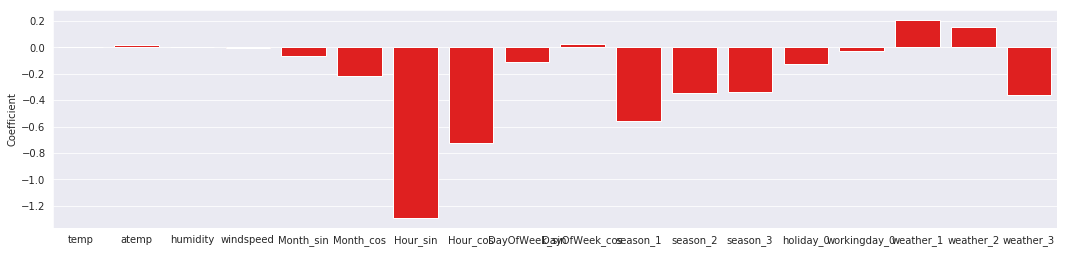

In [33]:
plt.figure(figsize = (18,4))
coeff = pd.DataFrame(lm.coef_, index = X.columns, columns = ['Coefficient'])
sns.barplot(x = coeff.index, y = 'Coefficient', data = coeff, color = 'red')

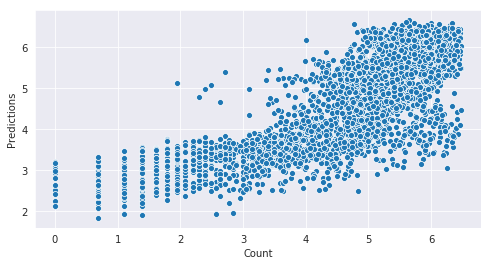

In [34]:
plt.figure(figsize = (8,4))
pred = lm.predict(X_test)
sns.scatterplot(x = y_test, y = pred)
plt.xlabel('Count')
plt.ylabel('Predictions')
plt.show()

The variability between the actual values and the predicted values is higher.

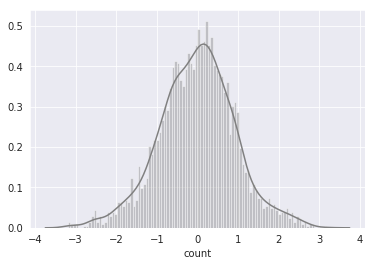

In [35]:
sns.distplot((y_test-pred),bins=100, color = 'gray')
plt.show()

The residual distribution is normal.

In [36]:
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred))))

RMSLE: 0.8816002300295306


**Ridge Regression**

In [37]:
from sklearn.linear_model import Ridge
#Assiging different sets of alpha values to explore which can be the best fit for the model. 
temp_msle = {}
for i in np.linspace(0, 40, 20):
    ridge = Ridge(alpha= i, normalize=True)
    #fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    pred = ridge.predict(X_test)

    msle = np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred)))
    temp_msle[i] = msle

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07155e-16): result may not be accurate.
  overwrite_a=True).T


In [38]:
temp_msle

{0.0: 0.881578060670275,
 2.1052631578947367: 1.0874351831056785,
 4.2105263157894735: 1.1809632543598048,
 6.315789473684211: 1.2299622807844501,
 8.421052631578947: 1.2602715941637135,
 10.526315789473683: 1.2809255367675045,
 12.631578947368421: 1.2959239770513158,
 14.736842105263158: 1.3073185353273473,
 16.842105263157894: 1.3162727828980056,
 18.94736842105263: 1.323496850816468,
 21.052631578947366: 1.329449127205872,
 23.157894736842103: 1.3344389206430436,
 25.263157894736842: 1.3386826005951293,
 27.36842105263158: 1.3423361127224351,
 29.473684210526315: 1.3455147203591162,
 31.57894736842105: 1.3483054728240411,
 33.68421052631579: 1.3507753487152157,
 35.78947368421053: 1.3529767302806788,
 37.89473684210526: 1.3549511772938005,
 40.0: 1.3567320867857644}

**Lasso Regression**

In [39]:
from sklearn.linear_model import Lasso
## Assiging different sets of alpha values to explore which can be the best fit for the model. 
temp_msle = {}
for i in np.logspace(-10, -1, 20):
    ## Assigin each model. 
    lasso = Lasso(alpha= i, normalize=True, tol = 0.1)
    ## fit the model. 
    lasso.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    pred = lasso.predict(X_test)

    msle = np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred)))
    temp_msle[i] = msle

In [40]:
temp_msle

{1e-10: 0.8816005907576794,
 2.976351441631313e-10: 0.8816005882709913,
 8.858667904100832e-10: 0.8816005815310385,
 2.6366508987303554e-09: 0.8816005636849733,
 7.847599703514623e-09: 0.8816005193219768,
 2.3357214690901214e-08: 0.8816004051772915,
 6.951927961775605e-08: 0.8816001620644464,
 2.06913808111479e-07: 0.8815997212342299,
 6.158482110660254e-07: 0.8815984600589337,
 1.8329807108324337e-06: 0.881603541142784,
 5.455594781168514e-06: 0.8816317254199642,
 1.623776739188721e-05: 0.8816614193938035,
 4.8329302385717524e-05: 0.8822645430227006,
 0.0001438449888287663: 0.8845466800832638,
 0.0004281332398719387: 0.8865749670718776,
 0.0012742749857031321: 0.908286065018587,
 0.003792690190732246: 1.0372208251343014,
 0.011288378916846883: 1.3913199585467961,
 0.03359818286283774: 1.3913199585467961,
 0.1: 1.3913199585467961}

**Random Forest**

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

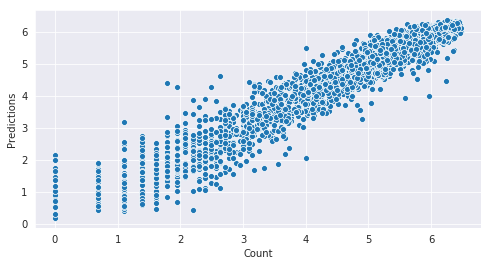

In [42]:
plt.figure(figsize = (8,4))
pred = rfr.predict(X_test)
sns.scatterplot(x = y_test, y = pred)
plt.xlabel('Count')
plt.ylabel('Predictions')
plt.show()

The variability between the actual values and the predicted values is lesser than the linear regression.

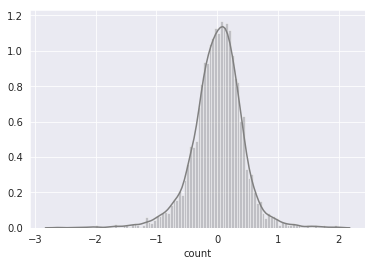

In [43]:
sns.distplot((y_test-pred),bins=100, color = 'gray')

In [44]:
#RMSLE
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred))))

RMSLE: 0.383372336983198


In [45]:
#submission
new = test_[cols]
pred = rfr.predict(new)
submission = pd.DataFrame({'datetime':test['datetime'],'count':np.exp(pred)})
submission['count'] = submission['count'].astype(int)
submission.to_csv('submission.csv',index=False)